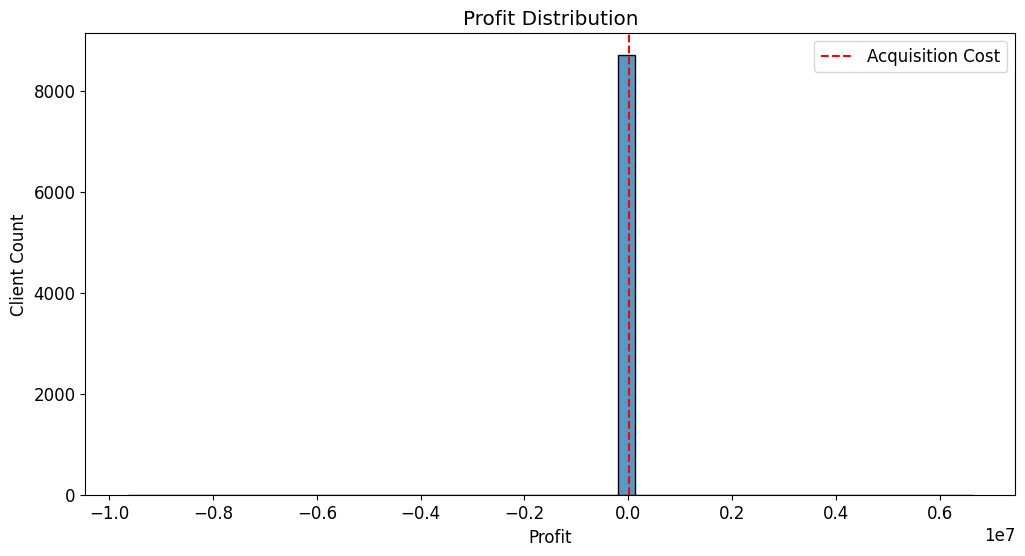

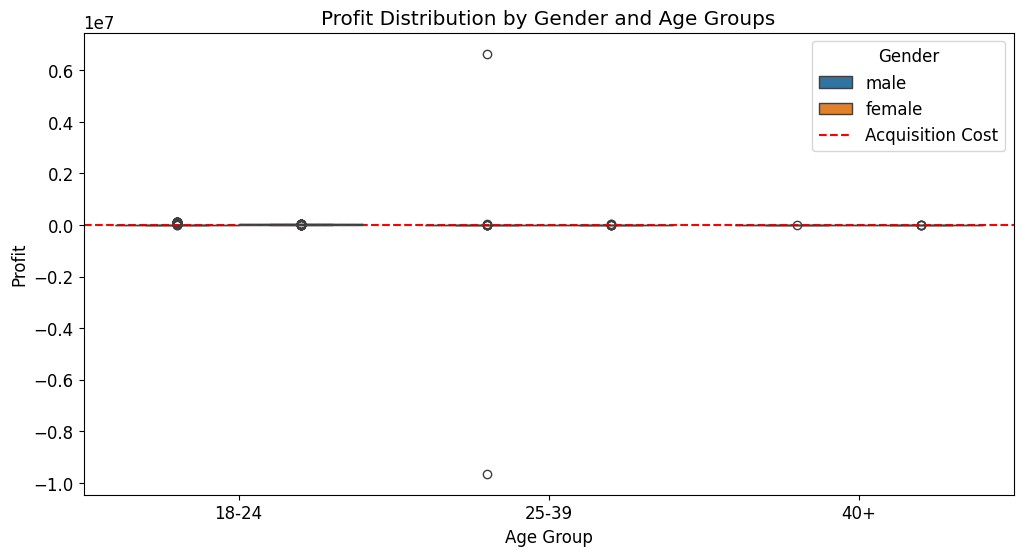

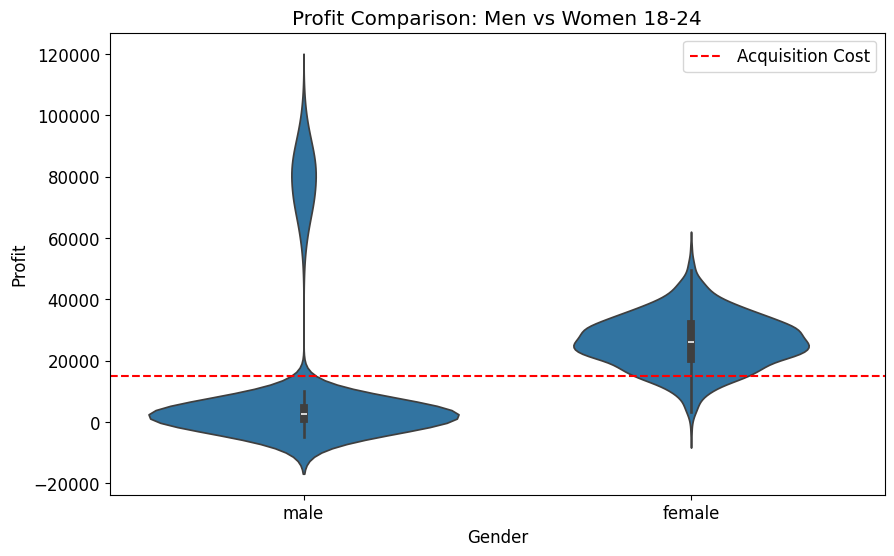

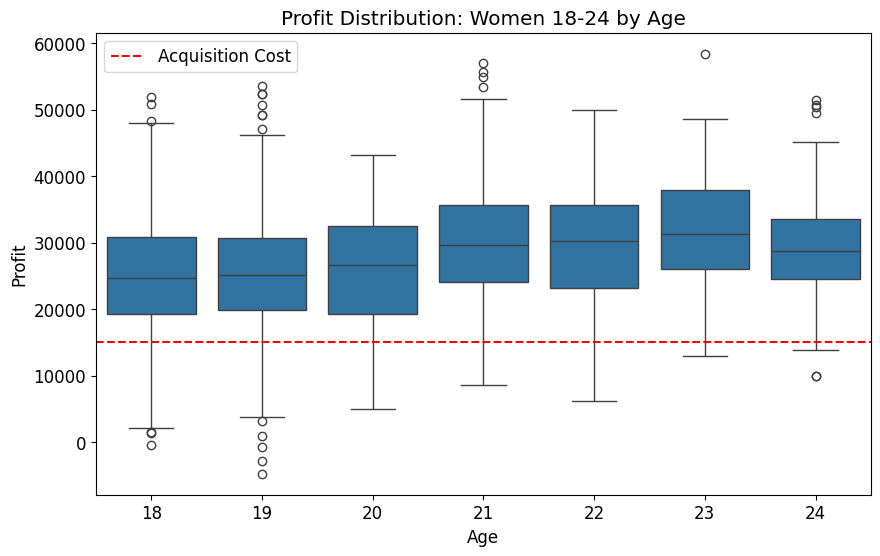

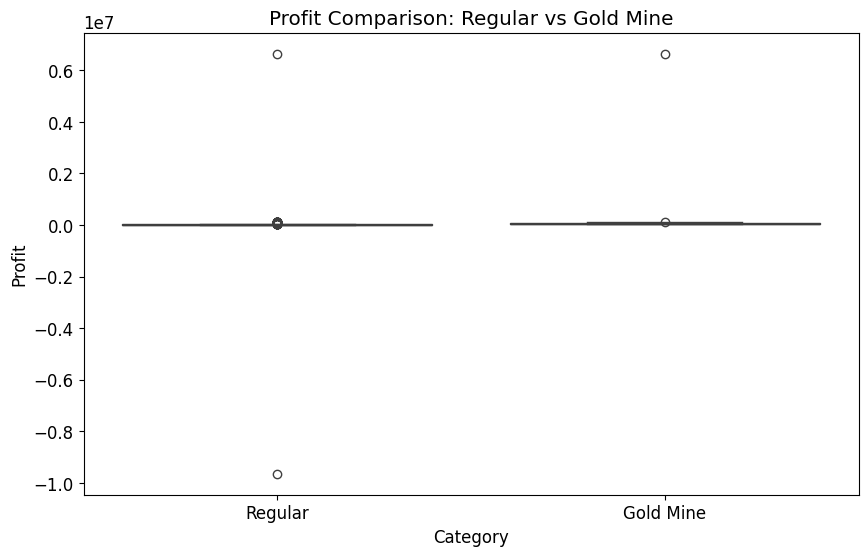

/home/rlohaw/Projects/Cases/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')
data['Gender'] = data['Gender'].map(lambda x: str(x).lower() if pd.notnull(x) else x)

def create_plots(data):
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 12
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Profit'], bins=50)
    plt.title('Profit Distribution')
    plt.xlabel('Profit')
    plt.ylabel('Client Count')
    plt.axvline(acquisition_cost, color='red', linestyle='--', label='Acquisition Cost')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='AgeGroup', y='Profit', hue='Gender', data=data)
    plt.title('Profit Distribution by Gender and Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Profit')
    plt.axhline(acquisition_cost, color='red', linestyle='--', label='Acquisition Cost')
    plt.legend(title='Gender')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    data_18_24 = data[data['AgeGroup'] == '18-24']
    sns.violinplot(x='Gender', y='Profit', data=data_18_24)
    plt.title('Profit Comparison: Men vs Women 18-24')
    plt.xlabel('Gender')
    plt.ylabel('Profit')
    plt.axhline(acquisition_cost, color='red', linestyle='--', label='Acquisition Cost')
    plt.legend()
    plt.show()
    
    women_18_24 = data[(data['Gender'] == 'female') & (data['Age'].between(18, 24))]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age', y='Profit', data=women_18_24)
    plt.title('Profit Distribution: Women 18-24 by Age')
    plt.xlabel('Age')
    plt.ylabel('Profit')
    plt.axhline(acquisition_cost, color='red', linestyle='--', label='Acquisition Cost')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Category', y='Profit', data=pd.DataFrame({
        'Category': ['Regular'] * len(data) + ['Gold Mine'] * len(data[data['Profit'] > 25000]),
        'Profit': list(data['Profit']) + list(data[data['Profit'] > 25000]['Profit'])
    }))
    plt.title('Profit Comparison: Regular vs Gold Mine')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.show()

client_count = len(data)
new_clients = 1000 
acquisition_cost = 15000
avg_profit = data['Profit'].mean()

create_plots(data)

_, p_val = ttest_ind(data['Profit'], [acquisition_cost] * client_count)
alpha = 0.05

men_18_24 = data[(data['Gender'] == 'male') & (data['AgeGroup'] == '18-24')]
women_18_24 = data[(data['Gender'] == 'female') & (data['AgeGroup'] == '18-24')]

men_profit = men_18_24['Profit'].mean()
women_profit = women_18_24['Profit'].mean()
    
_, p_val = ttest_ind(men_18_24['Profit'], women_18_24['Profit'])

target = 'Women 18-24' if women_profit > men_profit else 'Men 18-24'

_, p_men = ttest_ind(men_18_24['Profit'], [acquisition_cost] * len(men_18_24))  
_, p_women = ttest_ind(women_18_24['Profit'], [acquisition_cost] * len(women_18_24))

women_18_21 = data[(data['Gender'] == 'female') & (data['Age'].between(18, 21))]  
women_22_24 = data[(data['Gender'] == 'female') & (data['Age'].between(22, 24))]

profit_18_21 = women_18_21['Profit'].mean()  
profit_22_24 = women_22_24['Profit'].mean()

_, p_val = ttest_ind(women_18_21['Profit'], women_22_24['Profit'])  

alpha = 0.05 / 21
analysis = TTestIndPower()
power = 0.8
effect = 1600

n = analysis.solve_power(effect_size=effect/women_18_24['Profit'].std(),
                        alpha=alpha, power=power, nobs1=None)

gold_mine = data[data['Profit'] > 25000]
gold_profit = gold_mine['Profit'].mean()  

_, p_val = ttest_ind(gold_mine['Profit'], women_18_24['Profit'])

men_18 = data[(data['Gender'] == 'male') & (data['Age'] == 18)]

analysis = TTestIndPower()
power = 0.8
sample_size = len(men_18)

effect_size = analysis.solve_power(nobs1=sample_size, alpha=alpha, power=power)
mde_18 = effect_size * men_18['Profit'].std()

analysis = TTestIndPower()  
power = 0.8
sample_size = len(men_18_24) // 7
alpha_corr = alpha / 7

effect_size = analysis.solve_power(nobs1=sample_size, alpha=alpha_corr, power=power)  
mde_series = effect_size * men_18_24['Profit'].std()

# PRESENTATION
https://docs.google.com/presentation/d/1XmNwfALhabwOIlBoY64Ml_RQSqlj6e9K3_ni-icDdKE/edit?usp=sharing